In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../OriginalData/tb.csv') # reading the data in

# Description of the full tuberculosis dataset 
df.describe() 



,year,new_sp,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu
count,5769.000000,3081.000000,392.000000,401.000000,2381.000000,2407.000000,2408.000000,2415.000000,2421.000000,2414.000000,...,393.000000,404.000000,2378.000000,2394.000000,2400.000000,2398.000000,2401.000000,2394.000000,2396.000000,272.000000
mean,1994.229329,9089.718922,8.806122,28.975062,79.438051,922.364769,1301.894518,1205.566046,983.515489,696.171914,...,6.417303,39.185644,106.341043,758.737260,856.087500,586.597998,400.376510,276.178363,255.307596,2.540441
std,8.423265,38612.097933,46.094789,127.881505,280.489536,4278.638975,5253.398971,5409.064589,4780.782748,3771.934518,...,39.630100,170.491532,435.889885,3153.018686,3295.220001,2293.956123,1589.955543,1191.728829,1138.763846,38.261653
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1987.000000,97.000000,0.000000,0.000000,0.000000,10.000000,15.000000,16.000000,13.000000,9.000000,...,0.000000,0.000000,1.000000,8.000000,10.000000,7.000000,5.000000,4.000000,5.000000,0.000000
50%,1994.000000,1017.000000,0.000000,1.000000,6.000000,92.000000,151.500000,134.000000,98.000000,62.000000,...,0.000000,2.000000,7.000000,68.000000,86.000000,59.000000,38.000000,25.000000,29.000000,0.000000
75%,2002.000000,4985.000000,2.000000,8.000000,36.000000,511.500000,728.000000,591.500000,434.000000,273.750000,...,1.000000,13.250000,50.000000,427.000000,477.500000,309.000000,216.000000,144.750000,124.000000,0.000000
max,2008.000000,615977.000000,655.000000,1519.000000,4648.000000,77121.000000,83850.000000,90498.000000,78815.000000,57492.000000,...,620.000000,2062.000000,8319.000000,51485.000000,49887.000000,33664.000000,21486.000000,18203.000000,21339.000000,631.000000


In [18]:
# getting rid on NaN values
df = df.dropna()

# dropping the new_sp column as it doesn't provide much interesting information
df = df.drop(columns=['new_sp'])
df = df.drop(columns=['new_sp_m014'])
df = df.drop(columns=['new_sp_f014'])

# changing column names
names_lst = ['new_sp_m04', 'new_sp_m514', 'new_sp_m1524', 'new_sp_m2534', 'new_sp_m3544', 'new_sp_mu', 'new_sp_fu', 'new_sp_m4554', 'new_sp_m5564', 'new_sp_m65', 'new_sp_f04', 'new_sp_f514', 'new_sp_f1524', 'new_sp_f2534', 'new_sp_f3544', 'new_sp_f4554', 'new_sp_f5564', 'new_sp_f65']
for name in names_lst:
    df = df.rename(columns={name: name[7:]})
df

,iso2,year,m04,m514,m1524,m2534,m3544,m4554,m5564,m65,mu,f04,f514,f1524,f2534,f3544,f4554,f5564,f65,fu
15,AD,2005,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
16,AD,2006,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
18,AD,2008,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
44,AE,2008,0.0,0.0,6.0,1.0,7.0,5.0,3.0,6.0,0.0,0.0,0.0,10.0,4.0,1.0,1.0,3.0,3.0,0.0
141,AL,2005,0.0,0.0,26.0,21.0,16.0,31.0,20.0,37.0,0.0,0.0,0.0,3.0,9.0,5.0,5.0,5.0,18.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5383,US,2008,4.0,7.0,375.0,513.0,495.0,725.0,526.0,561.0,0.0,4.0,18.0,220.0,329.0,269.0,224.0,172.0,300.0,0.0
5412,UY,2008,0.0,1.0,49.0,71.0,64.0,45.0,28.0,34.0,0.0,0.0,4.0,26.0,35.0,26.0,15.0,13.0,13.0,0.0
5439,UZ,2007,0.0,18.0,569.0,768.0,579.0,583.0,282.0,380.0,0.0,1.0,24.0,485.0,507.0,342.0,255.0,235.0,436.0,0.0
5498,VE,2008,0.0,18.0,364.0,358.0,326.0,389.0,271.0,285.0,0.0,0.0,25.0,309.0,272.0,228.0,171.0,146.0,182.0,0.0


In [19]:
# Description of the tuberculosis dataset without NaN values 
df.describe() 

,year,m04,m514,m1524,m2534,m3544,m4554,m5564,m65,mu,f04,f514,f1524,f2534,f3544,f4554,f5564,f65,fu
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,2006.937759,4.755187,23.012448,341.261411,548.456432,493.921162,420.572614,245.219917,184.348548,0.593361,3.755187,30.937759,297.195021,367.468880,250.506224,177.074689,107.485477,119.340249,0.248963
std,1.190354,26.338229,117.820926,1309.364790,2198.766891,1974.053070,1602.099325,1073.949555,568.531598,2.953916,21.916941,156.063396,1339.981837,1808.250144,1278.165170,920.929188,596.715839,328.812485,1.138461
min,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,0.000000,0.000000,6.000000,10.000000,11.000000,10.000000,7.000000,7.000000,0.000000,0.000000,0.000000,4.000000,7.000000,5.000000,4.000000,2.000000,5.000000,0.000000
50%,2007.000000,0.000000,1.000000,23.000000,35.000000,46.000000,53.000000,30.000000,27.000000,0.000000,0.000000,1.000000,17.000000,22.000000,15.000000,11.000000,7.000000,19.000000,0.000000
75%,2008.000000,1.000000,5.000000,151.000000,271.000000,268.000000,198.000000,110.000000,144.000000,0.000000,1.000000,7.000000,115.000000,149.000000,91.000000,60.000000,40.000000,97.000000,0.000000
max,2008.000000,344.000000,1519.000000,15339.000000,22325.000000,20699.000000,18545.000000,14907.000000,6831.000000,30.000000,298.000000,2062.000000,14010.000000,21579.000000,13778.000000,11899.000000,8485.000000,3143.000000,10.000000


In [20]:
# Tidying up the dataframe
df = pd.melt(df, id_vars=['iso2', 'year'], value_vars=list(df.columns)[2:],
             var_name='column', value_name='cases')
df['cases'] = df['cases'].astype(int)
df['sex'] = df['column'].str[0]
df['age'] = df['column'].str[1:].map({
    '04': '0-4',
    '514': '5-14',
    '1524': '15-24',
    '2534': '25-34',
    '3544': '35-44',
    '4554': '45-54',
    '5564': '55-64',
    '65': '65+',
    'u' : 'undisclosed',
})
df = df[['iso2', 'year', 'sex', 'age', 'cases']]
df

df.to_csv('../AnalysisData/tb_but_tidy.csv')

           age    0
0          0-4  163
1        15-24   20
2        25-34   16
3        35-44   14
4        45-54   15
5         5-14  111
6        55-64   22
7          65+   20
8  undisclosed  213


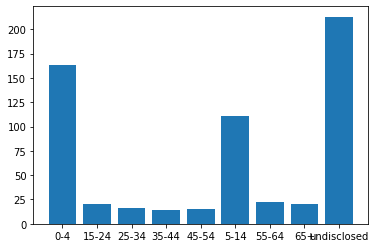

In [21]:
# Splitting the datasets by sex
split = df.groupby(df.sex)

# Male dataset
df_male = split.get_group('m')
df_male

# Tuberculosis age distribution amongst men

df_male.groupby(['age', 'cases']).size().groupby(level=0).max()
dfm = pd.DataFrame(df_male.groupby(['age', 'cases']).size().groupby(level=0).max())
dfm = dfm.reset_index()
print(dfm)

plt.bar(dfm['age'], dfm[0])
plt.show()

dfm.to_csv('../AnalysisData/tb_men_age_distribution.csv')

           age    0
0          0-4  167
1        15-24   22
2        25-34   19
3        35-44   22
4        45-54   28
5         5-14   92
6        55-64   33
7          65+   30
8  undisclosed  218


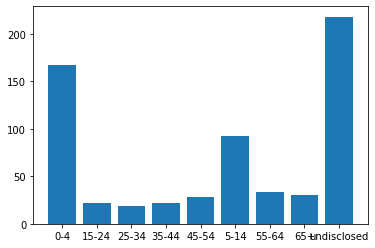

In [22]:

# Female dataset
df_female = split.get_group('f')
df_female.dropna()
# Tuberculosis age distribution amongst women

dff = pd.DataFrame(df_female.groupby(['age', 'cases']).size().groupby(level=0).max())
dff = dff.reset_index()
print(dff)

plt.bar(dff['age'], dff[0])
dff.to_csv('../AnalysisData/tb_women_age_distribution.csv')

In [23]:
# Tuberculosis distribution by sex
dfs = pd.DataFrame(df.groupby(['sex', 'cases']).size().groupby(level=0).max())
dfs = dfs.reset_index()
print(dfs)


  sex    0
0   f  631
1   m  593
